In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt


In [2]:
(x_train, _), (x_test, _) = keras.datasets.fashion_mnist.load_data()
x_train = x_train.astype("float32") / 255.
x_test = x_test.astype("float32") / 255.

# Flatten for simple AEs
x_train_flat = x_train.reshape((len(x_train), 28*28))
x_test_flat = x_test.reshape((len(x_test), 28*28))


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
encoding_dim = 64  # compressed dimension

# Encoder
input_img = keras.Input(shape=(784,))
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)

# Decoder
decoded = layers.Dense(784, activation='sigmoid')(encoded)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(x_train_flat, x_train_flat,
                epochs=10, batch_size=256,
                shuffle=True, validation_data=(x_test_flat, x_test_flat))


Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - loss: 0.4744 - val_loss: 0.3256
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.3169 - val_loss: 0.3046
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.2988 - val_loss: 0.2934
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.2894 - val_loss: 0.2876
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.2845 - val_loss: 0.2838
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.2812 - val_loss: 0.2815
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.2789 - val_loss: 0.2798
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.2769 - val_loss: 0.2787
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.2761 - val_loss: 0.2775
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.2753 - val_loss: 0.2769


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


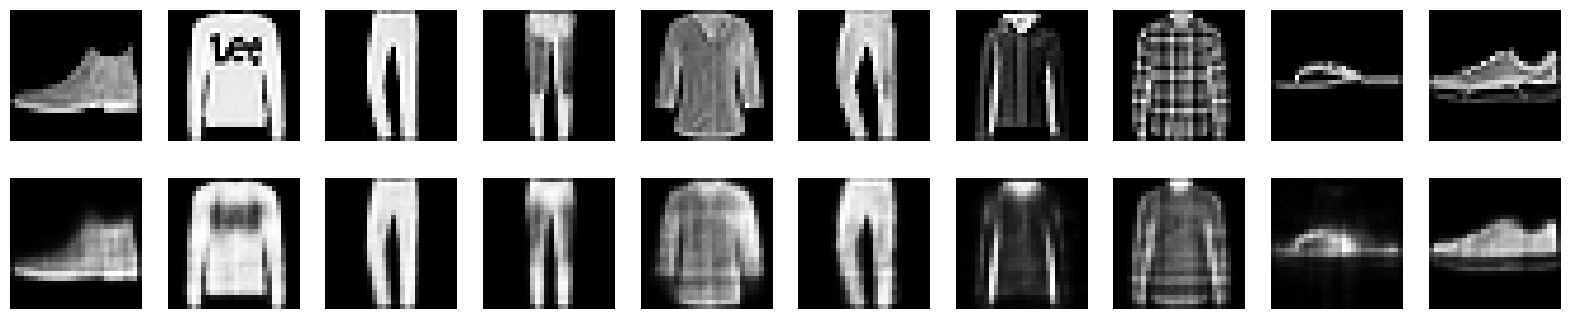

In [4]:
decoded_imgs = autoencoder.predict(x_test_flat)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i])
    plt.gray()
    ax.axis('off')

    # Reconstructed
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.axis('off')
plt.show()


Sparse Autoencoder

In [5]:
input_img = keras.Input(shape=(784,))
encoded = layers.Dense(128, activation='relu', activity_regularizer=keras.regularizers.l1(1e-5))(input_img)
decoded = layers.Dense(784, activation='sigmoid')(encoded)

sparse_ae = keras.Model(input_img, decoded)
sparse_ae.compile(optimizer='adam', loss='binary_crossentropy')

sparse_ae.fit(x_train_flat, x_train_flat,
              epochs=10, batch_size=256,
              shuffle=True, validation_data=(x_test_flat, x_test_flat))


Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - loss: 0.6498 - val_loss: 0.4694
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.4523 - val_loss: 0.4135
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.4043 - val_loss: 0.3870
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - loss: 0.3794 - val_loss: 0.3708
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.3656 - val_loss: 0.3609
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 0.3578 - val_loss: 0.3549
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 0.3516 - val_loss: 0.3508
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.3477 - val_loss: 0.3477
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 0.3454 - val_loss: 0.3451
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.3425 - val_loss: 0.3432


Denoising Autoencoder

In [6]:
noise_factor = 0.4
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

input_img = keras.Input(shape=(784,))
encoded = layers.Dense(128, activation='relu')(input_img)
decoded = layers.Dense(784, activation='sigmoid')(encoded)

denoise_ae = keras.Model(input_img, decoded)
denoise_ae.compile(optimizer='adam', loss='binary_crossentropy')

denoise_ae.fit(x_train_noisy.reshape(-1, 784), x_train_flat,
               epochs=10, batch_size=256,
               shuffle=True, validation_data=(x_test_noisy.reshape(-1, 784), x_test_flat))


Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - loss: 0.4567 - val_loss: 0.3296
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.3215 - val_loss: 0.3151
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.3105 - val_loss: 0.3086
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.3031 - val_loss: 0.3023
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.2987 - val_loss: 0.2992
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.2942 - val_loss: 0.2969
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 0.2927 - val_loss: 0.2946
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.2908 - val_loss: 0.2933
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 0.2897 - val_loss: 0.2921
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 0.2885 - val_loss: 0.2913


Convolutional Autoencoder (CAE)

In [7]:
x_train_cnn = np.expand_dims(x_train, axis=-1)
x_test_cnn = np.expand_dims(x_test, axis=-1)

input_img = keras.Input(shape=(28, 28, 1))

# Encoder
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# Decoder
x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

cae = keras.Model(input_img, decoded)
cae.compile(optimizer='adam', loss='binary_crossentropy')
cae.fit(x_train_cnn, x_train_cnn, epochs=10, batch_size=128, validation_data=(x_test_cnn, x_test_cnn))


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 121s 253ms/step - loss: 0.3621 - val_loss: 0.2792
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 116s 246ms/step - loss: 0.2750 - val_loss: 0.2725
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 142s 246ms/step - loss: 0.2697 - val_loss: 0.2689
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 141s 245ms/step - loss: 0.2665 - val_loss: 0.2667
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 139s 239ms/step - loss: 0.2633 - val_loss: 0.2643
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 113s 242ms/step - loss: 0.2619 - val_loss: 0.2626
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 113s 240ms/step - loss: 0.2596 - val_loss: 0.2615
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 114s 242ms/step - loss: 0.2596 - val_loss: 0.2606
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 112s 238ms/step - loss: 0.2583 - val_loss: 0.2600
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 113s 241ms/step - loss: 0.2574 - val_loss: 0.2593


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step


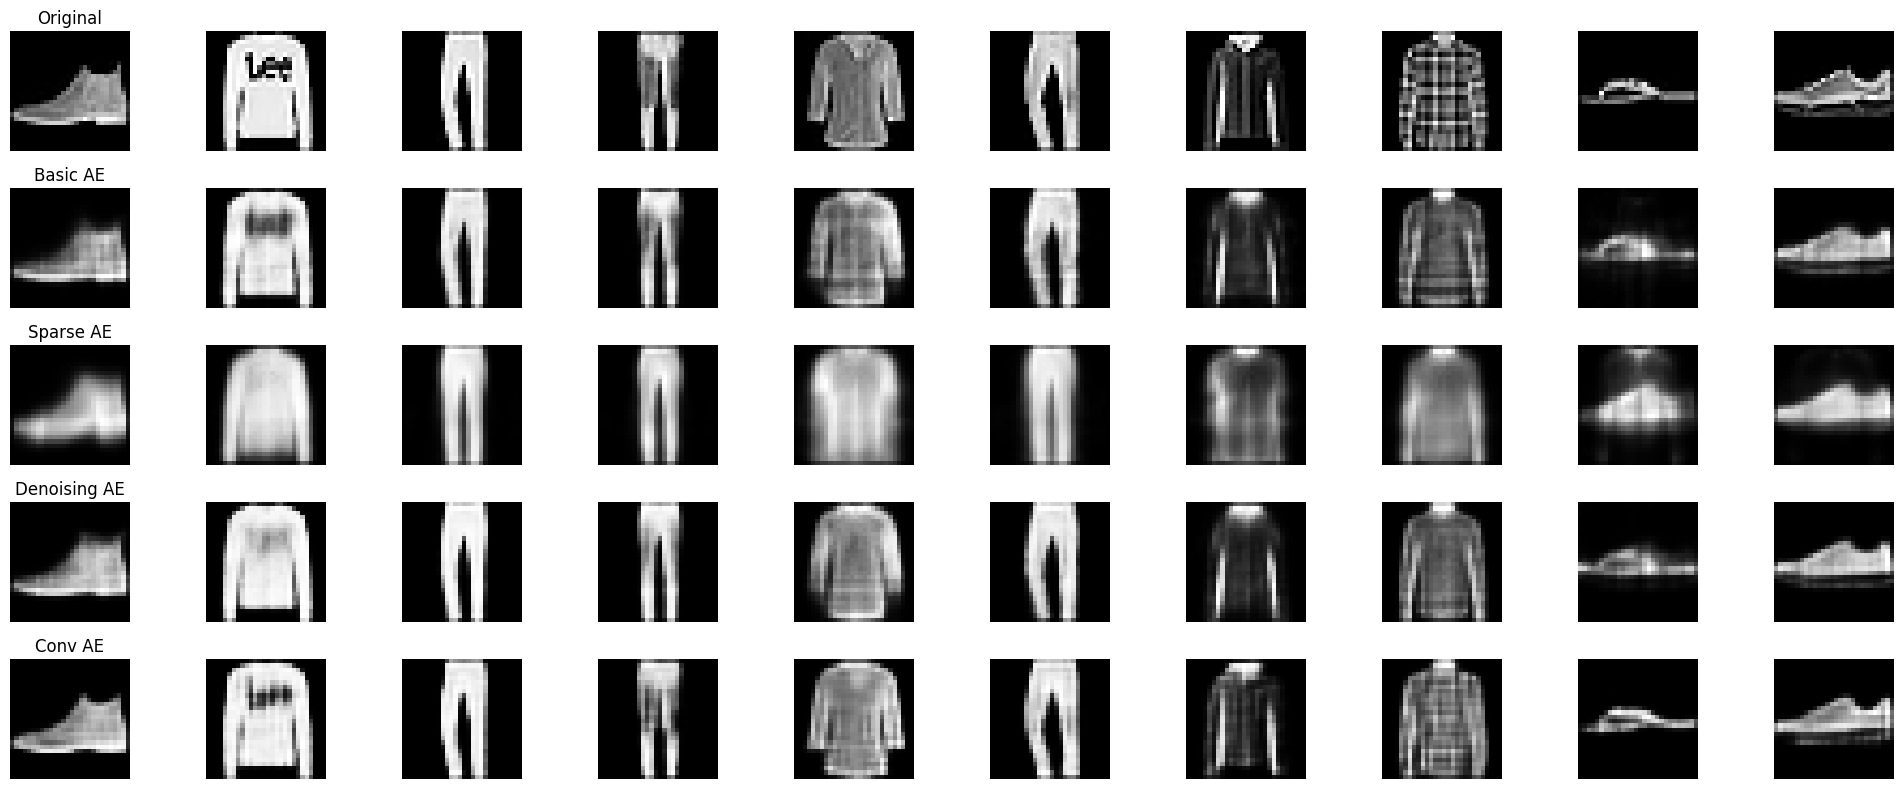

In [12]:
# Predict outputs for all autoencoders
decoded_basic = autoencoder.predict(x_test_flat)
decoded_sparse = sparse_ae.predict(x_test_flat)
decoded_denoise = denoise_ae.predict(x_test_flat)
decoded_cae = cae.predict(x_test_cnn)  # CNN AE uses 4D input

# Number of images to display
n = 10
plt.figure(figsize=(20, 8))
for i in range(n):
    # Original
    ax = plt.subplot(5, n, i+1)
    plt.imshow(x_test[i], cmap='gray')
    ax.axis('off')
    if i == 0: ax.set_title("Original")

    # Basic AE
    ax = plt.subplot(5, n, i+1+n)
    plt.imshow(decoded_basic[i].reshape(28,28), cmap='gray')
    ax.axis('off')
    if i == 0: ax.set_title("Basic AE")

    # Sparse AE
    ax = plt.subplot(5, n, i+1+2*n)
    plt.imshow(decoded_sparse[i].reshape(28,28), cmap='gray')
    ax.axis('off')
    if i == 0: ax.set_title("Sparse AE")

    # Denoising AE
    ax = plt.subplot(5, n, i+1+3*n)
    plt.imshow(decoded_denoise[i].reshape(28,28), cmap='gray')
    ax.axis('off')
    if i == 0: ax.set_title("Denoising AE")

    # Convolutional AE
    ax = plt.subplot(5, n, i+1+4*n)
    plt.imshow(decoded_cae[i].reshape(28,28), cmap='gray')
    ax.axis('off')
    if i == 0: ax.set_title("Conv AE")

plt.tight_layout()
plt.show()
